In [90]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline


Let us now create the training set. 
The training set size is 128 x 7.
Every row contains an input vector of length 7 which is an array of 1s and -1s.
We will take all possible 128 combinations of data here. 



In [109]:
"""
Generate data sample based on the number. The function converets integer to base 7 binary array and replaces 0 with-1
"""
def generate_input(num):
  output = [int(x) for x in '{:07b}'.format(num)]
  output = [-1 if n == 0 else n for n in output]
  return np.array(output)

In [110]:
X = np.zeros((128, 7))#create training set
for i in range(128):
  X[i]=generate_input(i)

We are now looking to train the weights of the 2 layers of neurons.
In the input layer we have 7 input neurons. After adding the bias term, we get 8 input neurons. The hidden layer has 12 neurons. Therefore the dimension of the layer 1 weights w1 matrix is 8x12. These 12 hidden neurons along with the bias perceptron are linked to one output neuron. Hence the layer 2 w2 weight matrix is of dimension 13x1.

In every epoch we feed all the 128 training data (shuffled after every epoch) to the input neurons. These propogate to the output neuron. 

At the end of every epoch we average the squared output error observed for all 128 samples. Running this over 1000 epochs will give us an idea of the distribution of the training error. 

In [120]:
def train_weights(eta):
  np.random.seed(40)
  #initialize weights to random between(-1, 1)
  w1 = np.random.uniform(low = -1, high=1, size=(8,12))
  w2 = np. random.uniform(low = -1, high = 1, size = (13,1))
  e_arr = []
  flag = True
  for j in range(200):
    np.random.shuffle(X) #shuffle the data rows
    e_sum = 0
    for i in range(128): #iterate over all combination in 7 bit array
      x = X[i].reshape(7,1)
      x_augmented = np.insert(x, 0, 1, axis=0) #add the bias term
      #forward prop
      v1 = np.matmul(np.transpose(w1), x_augmented) #compute w'x 
      y1 = np.tanh(v1) #activation function on hidden layer perceptrons
      y1_augmented = np.insert(y1, 0, 1, axis=0) #add bias term
      v2 = np.matmul(np.transpose(w2), y1_augmented)  # compute w'x
      y2 = np.tanh(v2) #activation function perceptrons in output layer
      odd_parity_sum = [-5.0, -1.0, 3.0, 7.0]  # output of the input data is 1 if there exists odd no. of 1s else its -1
      d = 1 if sum(x) in odd_parity_sum else -1
      e = (d-y2) #error in prediction
      e_sum = e_sum + (0.5 * e **2)[0][0] #mean squared error
      #back prop      
      delta2 = (1-y2)*(1+y2) * (e) # gradient of tanh(v2) = (1+y2)*(1-y2) as y2 = tanh(v2)
      delta1 = (1-y1)*(1+y1) * ((w2 * delta2)[1:])

      w2 = w2 + eta * (y1_augmented * np.transpose(delta2)) #update rule for weight = w+ eta*delta2*y1
      w1 = w1 + eta * x_augmented * np.transpose(delta1) # w1= w1 + eta * delta1 * x

    e_avg = e_sum / 128 #average the errors observed in this epoch
    if e_avg < 0.1 and flag: #if average error is less than 0.1 take these weights as the final. Convergence reached
      print("Convergence for eta ={} achieved at epoch {}".format(eta, j))
      flag = False
    e_arr.append(e_avg)
  return e_arr

Convergence for eta =0.005 achieved at epoch 109
Convergence for eta =0.01 achieved at epoch 55
Convergence for eta =0.015 achieved at epoch 37
Convergence for eta =0.02 achieved at epoch 28
Convergence for eta =0.025 achieved at epoch 25
Convergence for eta =0.030000000000000002 achieved at epoch 20
Convergence for eta =0.034999999999999996 achieved at epoch 17
Convergence for eta =0.04 achieved at epoch 17
Convergence for eta =0.045 achieved at epoch 14
Convergence for eta =0.049999999999999996 achieved at epoch 15


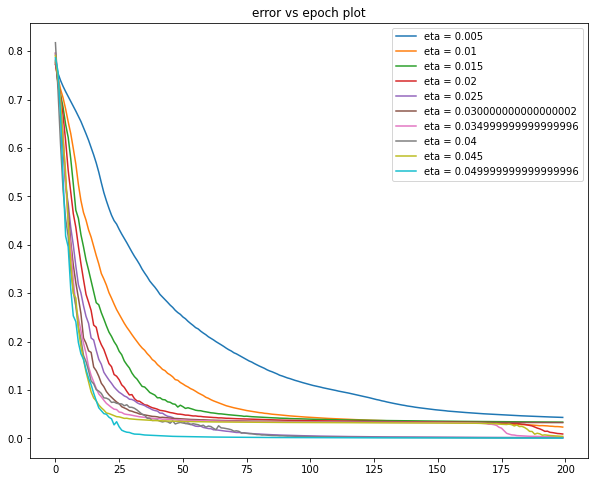

In [121]:
fig = plt.figure(figsize=(10,8))
i=1                    
for eta in [0.005 + x*0.005 for x in range(10)]:
  arr = train_weights(eta)
  plt.plot(arr, label = "eta = {}".format(eta))
  plt.title("error vs epoch plot")
  plt.legend()


The above graph plots the error observed after every epoch. As can be seen from the graphs, smaller learning rate values take larger time to converge. 

In [128]:
def train_weights_with_momentum(eta, alpha):
  np.random.seed(40)
  #initialize weights to random between(-1, 1)
  w1 = np.random.uniform(low = -1, high=1, size=(8,12))
  w2 = np. random.uniform(low = -1, high = 1, size = (13,1))
  e_arr = []
  flag = True
  for j in range(200):
    np.random.shuffle(X) #shuffle the data rows
    e_sum = 0
    for i in range(128): #iterate over all combination in 7 bit array
      x = X[i].reshape(7,1)
      x_augmented = np.insert(x, 0, 1, axis=0) #add the bias term
      #forward prop
      v1 = np.matmul(np.transpose(w1), x_augmented) #compute w'x 
      y1 = np.tanh(v1) #activation function on hidden layer perceptrons
      y1_augmented = np.insert(y1, 0, 1, axis=0) #add bias term
      v2 = np.matmul(np.transpose(w2), y1_augmented)  # compute w'x
      y2 = np.tanh(v2) #activation function perceptrons in output layer
      odd_parity_sum = [-5.0, -1.0, 3.0, 7.0]  # output of the input data is 1 if there exists odd no. of 1s else its -1
      d = 1 if sum(x) in odd_parity_sum else -1
      e = (d-y2) #error in prediction
      e_sum = e_sum + (0.5 * e **2)[0][0] #mean squared error
      #back prop      
      delta2 = (1-y2)*(1+y2) * (e) # gradient of tanh(v2) = (1+y2)*(1-y2) as y2 = tanh(v2)
      delta1 = (1-y1)*(1+y1) * ((w2 * delta2)[1:])

      w2 = w2 + eta * (y1_augmented * np.transpose(delta2)) / (1-alpha) #adding momentum speeds up the learning function for large etas
      w1 = w1 + eta * x_augmented * np.transpose(delta1) / (1-alpha) 

    e_avg = e_sum / 128 #average the errors observed in this epoch
    if e_avg < 0.1 and flag: #if average error is less than 0.1 take these weights as the final. Convergence reached
      print("Convergence for eta ={} achieved at epoch {}".format(eta, j))
      flag = False
    e_arr.append(e_avg)

  return e_arr


Convergence for eta =0.005 achieved at epoch 23
Convergence for eta =0.01 achieved at epoch 14
Convergence for eta =0.015 achieved at epoch 12
Convergence for eta =0.02 achieved at epoch 10
Convergence for eta =0.025 achieved at epoch 9
Convergence for eta =0.030000000000000002 achieved at epoch 13
Convergence for eta =0.034999999999999996 achieved at epoch 15
Convergence for eta =0.045 achieved at epoch 67
Convergence for eta =0.049999999999999996 achieved at epoch 50


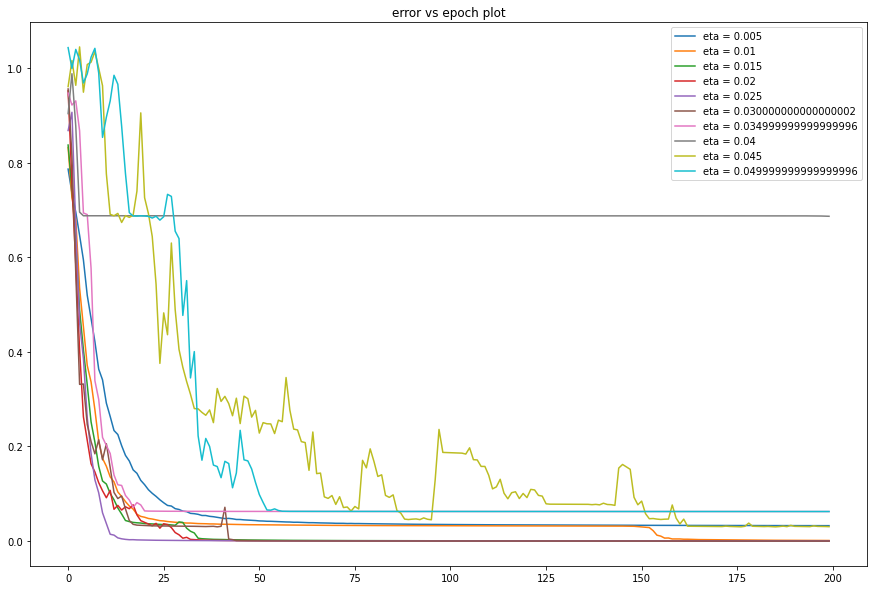

In [130]:
fig = plt.figure(figsize=(15,10))
for eta in [0.005 + x*0.005 for x in range(10)]:
  arr = train_weights_with_momentum(eta, alpha=0.8)
  plt.plot(arr, label = "eta = {}".format(eta))
  plt.title("error vs epoch plot")
  plt.legend()


The affect of adding momentum to speed up the learning rate is rather interesting. As can be seen from the ouputs, eta = 0.045 has not yet converged after 200 epochs. This can be attributed to the fact that
eta/(1-alpha) cannot be too large. When alpha = 0.8 , we have the new effective learning rate as 5*eta. So we need to have 5eta to be less than 0.05 atleast. Which means momentum addition can work for eta less than 0.01. When eta is greater than 0.01, the algorithm may end up in local minimas.


Convergence for eta =0.005 achieved at epoch 109
Convergence for eta =0.005 achieved at epoch 23


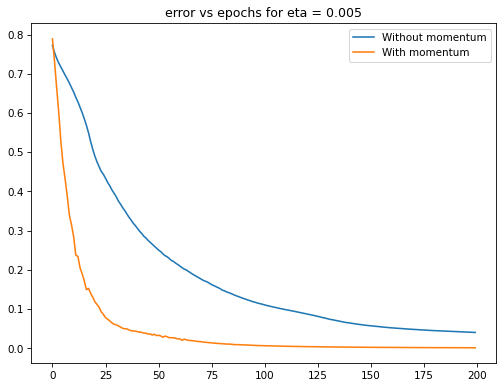

In [131]:
fig = plt.figure(figsize=(8,6), dpi = 75)
eta = 0.005
plt.plot(train_weights(eta), label = "Without momentum")
plt.plot(train_weights_with_momentum(eta, alpha = 0.8 ), label = "With momentum")
plt.title("error vs epochs for eta = {}".format(eta))
plt.legend()
plt.show()

Adding the momentum term here is speeding up the the learning process.

Convergence for eta =0.045 achieved at epoch 13
Convergence for eta =0.045 achieved at epoch 125


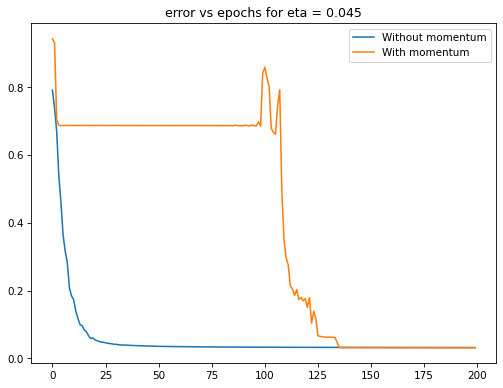

In [132]:
fig = plt.figure(figsize=(8,6), dpi = 75)
eta = 0.045
plt.plot(train_weights(eta), label = "Without momentum")
plt.plot(train_weights_with_momentum(eta, alpha = 0.8), label = "With momentum")
plt.title("error vs epochs for eta = {}".format(eta))
plt.legend()
plt.show()

Adding the momentum term has slowed down the learning process. Let us look at eta values in the range 0.05 to 0.005

Convergence for eta =0.005 achieved at epoch 25
Convergence for eta =0.01 achieved at epoch 14
Convergence for eta =0.015 achieved at epoch 11
Convergence for eta =0.02 achieved at epoch 10
Convergence for eta =0.025 achieved at epoch 19
Convergence for eta =0.030000000000000002 achieved at epoch 10
Convergence for eta =0.034999999999999996 achieved at epoch 15
Convergence for eta =0.04 achieved at epoch 25
Convergence for eta =0.045 achieved at epoch 30


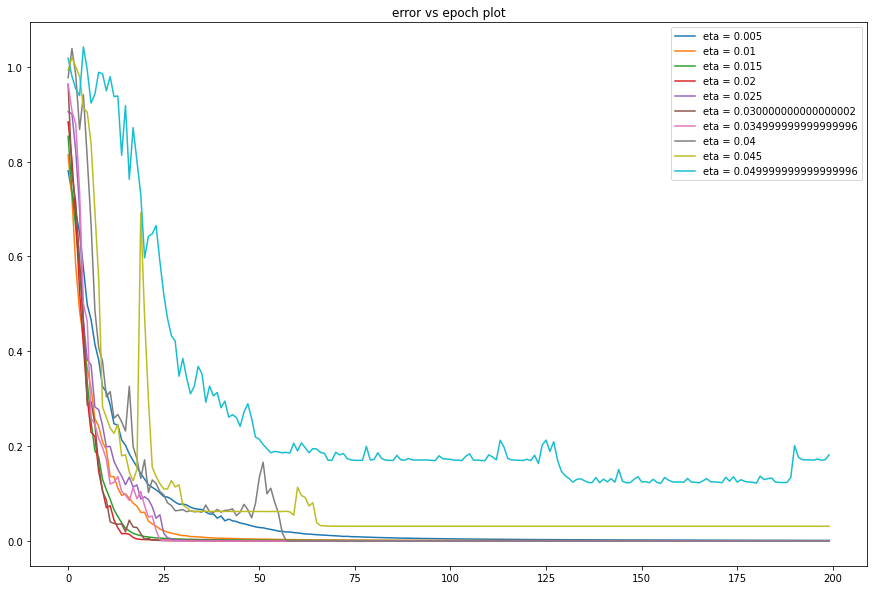

In [137]:
fig = plt.figure(figsize=(15,10))
for eta in [0.005 + x*0.005 for x in range(10)]:
  arr = train_weights_with_momentum(eta, alpha=0.8)
  plt.plot(arr, label = "eta = {}".format(eta))
  plt.title("error vs epoch plot")
  plt.legend()

From the above plot we see that for eta greater than 0.25, it fails to converge sooner. So we can play around with the momentum only around this value i.e 5eta = 0.25, eta = 0.05. Which verifies our above observations. Here convergence may happen after 200 epochs but its not of much use to us.

Convergence for eta =0.003 achieved at epoch 176
Convergence for eta =0.004 achieved at epoch 134
Convergence for eta =0.005 achieved at epoch 107
Convergence for eta =0.006 achieved at epoch 91
Convergence for eta =0.007 achieved at epoch 80
Convergence for eta =0.008 achieved at epoch 69
Convergence for eta =0.009000000000000001 achieved at epoch 62
Convergence for eta =0.010000000000000002 achieved at epoch 58


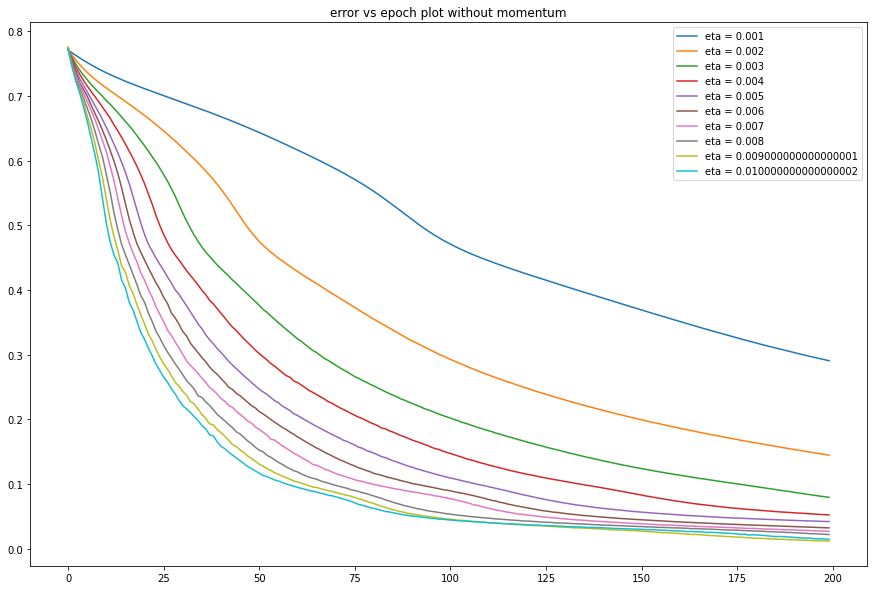

In [139]:
fig = plt.figure(figsize=(15,10))
for eta in [0.001 + x*0.001 for x in range(10)]:
  arr = train_weights_with_momentum(eta, alpha=0)
  plt.plot(arr, label = "eta = {}".format(eta))
  plt.title("error vs epoch plot without momentum")
  plt.legend()

Convergence for eta =0.001 achieved at epoch 110
Convergence for eta =0.002 achieved at epoch 59
Convergence for eta =0.003 achieved at epoch 37
Convergence for eta =0.004 achieved at epoch 28
Convergence for eta =0.005 achieved at epoch 24
Convergence for eta =0.006 achieved at epoch 22
Convergence for eta =0.007 achieved at epoch 18
Convergence for eta =0.008 achieved at epoch 15
Convergence for eta =0.009000000000000001 achieved at epoch 16
Convergence for eta =0.010000000000000002 achieved at epoch 14


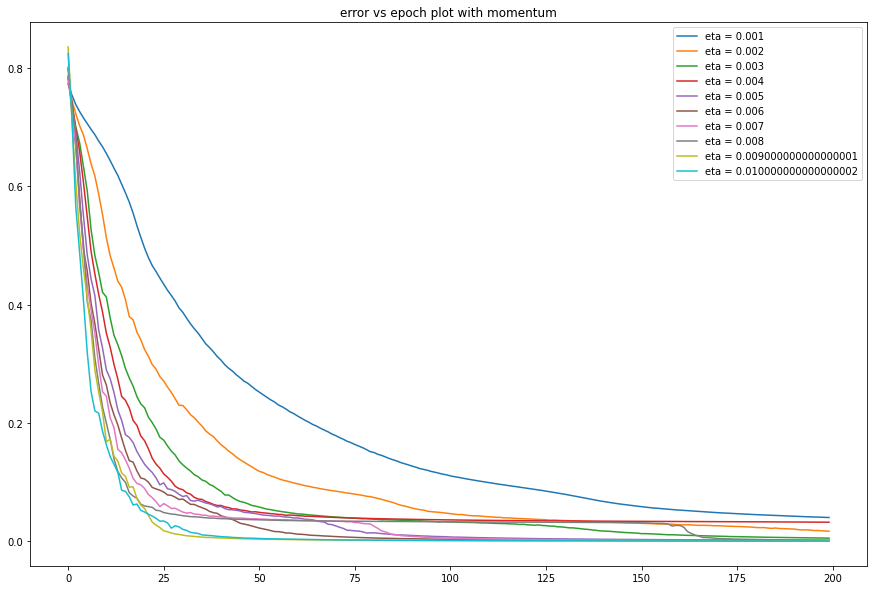

In [141]:
fig = plt.figure(figsize=(15,10))
for eta in [0.001 + x*0.001 for x in range(10)]:
  arr = train_weights_with_momentum(eta, alpha=0.8)
  plt.plot(arr, label = "eta = {}".format(eta))
  plt.title("error vs epoch plot with momentum")
  plt.legend()

From the above two graphs we see that adding momentum has increased the learning rate of the algorithm and the convergence is achieved faster

## Sigmoid as the activation function

In [155]:
def train_weights_sigmoid(eta, alpha):
  np.random.seed(40)
  #initialize weights to random between(-1, 1)
  w1 = np.random.uniform(low = -1, high=1, size=(8,12))
  w2 = np. random.uniform(low = -1, high = 1, size = (13,1))
  e_arr = []
  flag = True
  for j in range(1000):
    np.random.shuffle(X) #shuffle the data rows
    e_sum = 0
    for i in range(128): #iterate over all combination in 7 bit array
      x = X[i].reshape(7,1)
      x_augmented = np.insert(x, 0, 1, axis=0) #add the bias term
      #forward prop
      v1 = np.matmul(np.transpose(w1), x_augmented) #compute w'x 
      y1 = 1 / (1+ np.exp(-1 * v1))
      # y1 = np.tanh(v1) #activation function on hidden layer perceptrons
      y1_augmented = np.insert(y1, 0, 1, axis=0) #add bias term
      v2 = np.matmul(np.transpose(w2), y1_augmented)  # compute w'x
      y2 = 1 / (1+ np.exp(-1 * v2)) #activation function perceptrons in output layer
      odd_parity_sum = [-5.0, -1.0, 3.0, 7.0]  # output of the input data is 1 if there exists odd no. of 1s else its -1
      d = 1 if sum(x) in odd_parity_sum else -1
      e = (d-y2) #error in prediction
      e_sum = e_sum + (0.5 * e **2)[0][0] #mean squared error
      #back prop      
      delta2 = (y2)*(1-y2) * (e) # gradient of sigmoid(v2) = (y2)*(1-y2) as y2 = tanh(v2)
      delta1 = (y1)*(1-y1) * ((w2 * delta2)[1:])

      w2 = w2 + eta * (y1_augmented * np.transpose(delta2)) / (1-alpha) #adding momentum speeds up the learning function for large etas
      w1 = w1 + eta * x_augmented * np.transpose(delta1) / (1-alpha) 

    e_avg = e_sum / 128 #average the errors observed in this epoch
    if e_avg < 0.01 and flag: #if average error is less than 0.1 take these weights as the final. Convergence reached
      print("Convergence for eta ={} achieved at epoch {}".format(eta, j))
      flag = False
    e_arr.append(e_avg)

  return e_arr


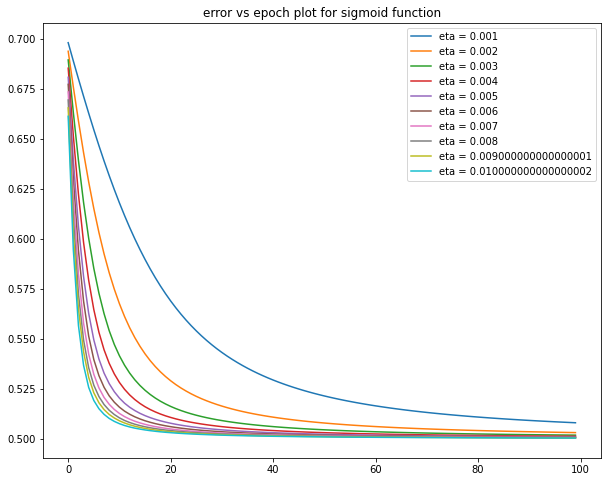

In [149]:
fig = plt.figure(figsize=(10,8))
for eta in [0.001 + x*0.001 for x in range(10)]:
  arr = train_weights_sigmoid(eta, alpha=0)
  plt.plot(arr, label = "eta = {}".format(eta))
  plt.title("error vs epoch plot for sigmoid function")
  plt.legend()

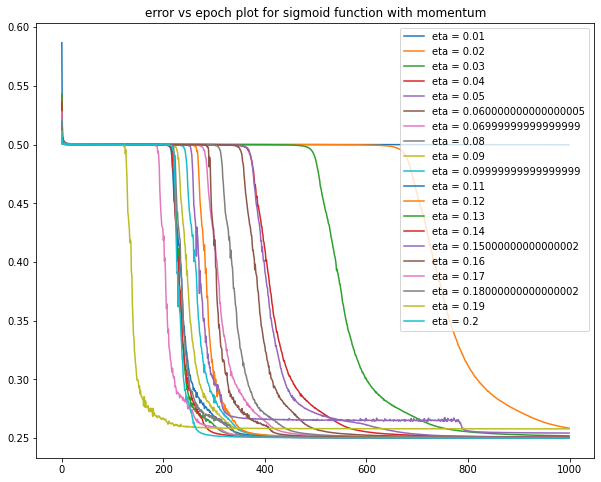

In [156]:
fig = plt.figure(figsize=(10,8))
for eta in [0.01 + x*0.01 for x in range(20)]:
  arr = train_weights_sigmoid(eta, alpha=0.8)
  plt.plot(arr, label = "eta = {}".format(eta))
  plt.title("error vs epoch plot for sigmoid function with momentum")
  plt.legend()

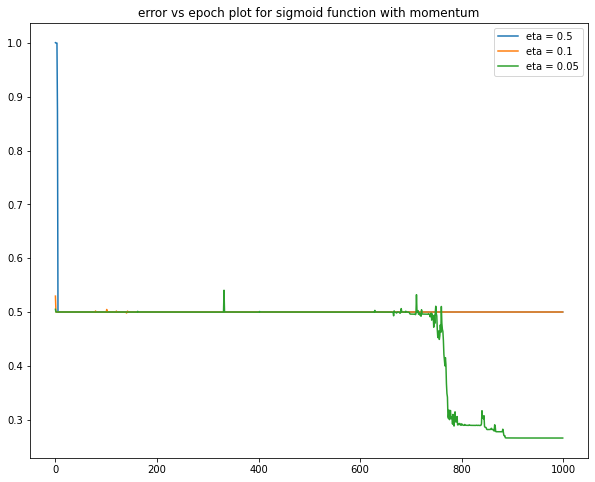

In [159]:
fig = plt.figure(figsize=(10,8))
for eta in [0.5, 0.1, 0.05]:
  arr = train_weights_sigmoid(eta, alpha=0.99)
  plt.plot(arr, label = "eta = {}".format(eta))
  plt.title("error vs epoch plot for sigmoid function with momentum")
  plt.legend()

# Report

Goal of this lab is to build a model that correctly predicts the ouput of a 7 bit odd parity detector.

* We first build the training data set.The training set size is 128 x 7. Every row contains an input vector of length 7 which is an array of 1s and -1s. We will take all possible 128 combinations of data here.

* We build a network with 1 input layer with 7 perceptrons, a hidden layer with 12 perceptrons and output layer with 1 perceptron.

* We next train the weights of the 2 layers of neurons. In the input layer we have 7 input neurons. After adding the bias term, we get 8 input neurons. The hidden layer has 12 neurons. Therefore the dimension of the layer 1 weights w1 matrix is 8x12. These 12 hidden neurons along with the bias perceptron are linked to one output neuron. Hence the layer 2 w2 weight matrix is of dimension 13x1.

* In every epoch we feed all the 128 training data (shuffled after every epoch) to the input neurons. These propogate to the output neuron.

* Then the error observed in the output layer is fed back through the inner layers.  While we use the activation function during the feed forward process to calculate the output of the next layer, we use the derivative of the activation function during back propagation. These two processes can be visualized as inverse processses.  

* At the end of every epoch we average the squared output error observed for all 128 samples. Running this over 1000 epochs will give us an idea of the distribution of the training error.

* The learning rate of the algorithm decides how soon the gradient descent converges or even converges at all.






##Results

**Effect of learning rate:**

Convergence for eta =0.005 achieved at epoch 109

Convergence for eta =0.01 achieved at epoch 55

Convergence for eta =0.015 achieved at epoch 37

Convergence for eta =0.02 achieved at epoch 28

Convergence for eta =0.025 achieved at epoch 25

Convergence for eta =0.030000000000000002 achieved at epoch 20

Convergence for eta =0.034999999999999996 achieved at epoch 17

Convergence for eta =0.04 achieved at epoch 17

Convergence for eta =0.045 achieved at epoch 14

Convergence for eta =0.049999999999999996 achieved at epoch 15

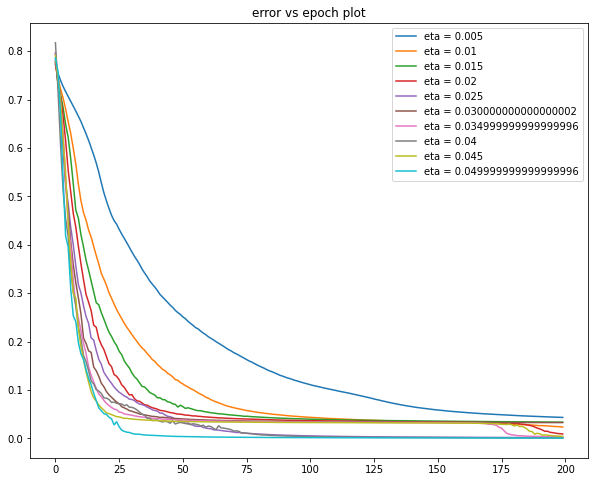

As can be seen from the output as learning rate increases, the algorithm converges faster. But as eta nears 0.05, the number of epochs needed becomes equal.

Adding the momentum term makes things interesting here. Even though momentum term helps speed up the convergece for larger eta values, we see that it is not true for all learning rate values here.

Convergence for eta =0.005 achieved at epoch 23

Convergence for eta =0.01 achieved at epoch 14

Convergence for eta =0.015 achieved at epoch 12

Convergence for eta =0.02 achieved at epoch 10

Convergence for eta =0.025 achieved at epoch 9

Convergence for eta =0.030000000000000002 achieved at epoch 13

Convergence for eta =0.034999999999999996 achieved at epoch 15

Convergence for eta =0.045 achieved at epoch 67

Convergence for eta =0.049999999999999996 achieved at epoch 50

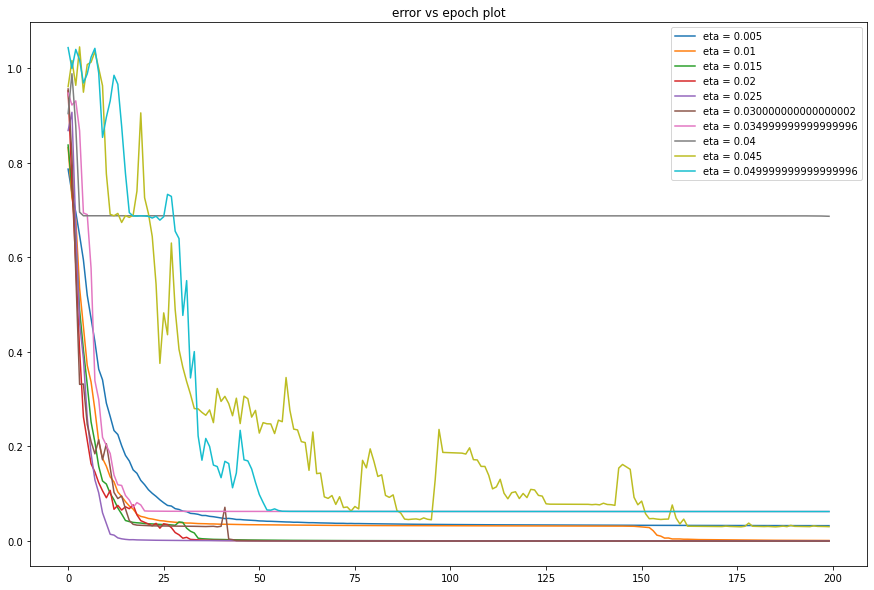



**Let us look at learning rate 0.005.**

Convergence for eta =0.005 achieved at epoch 109

Convergence for eta =0.005 achieved at epoch 23

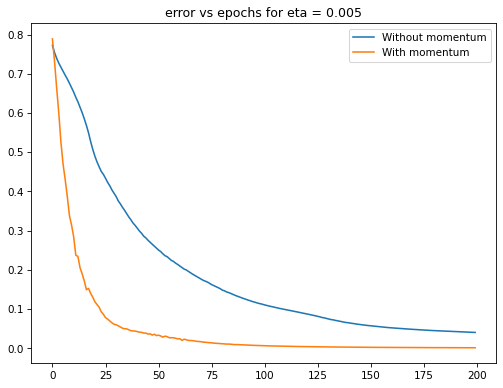

Here adding the momentum term has helped us accelerate learning.

Let us look at learning rate 0.045

Convergence for eta =0.045 achieved at epoch 13

Convergence for eta =0.045 achieved at epoch 125

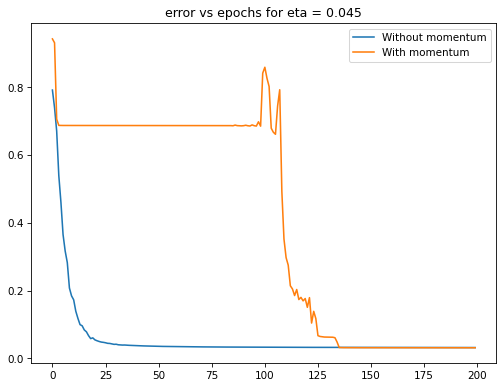

Here adding the momentum term has increased the convergence time. 

As can be seen from the ouputs, eta = 0.045 has not yet converged after 200 epochs. This can be attributed to the fact that eta/(1-alpha) cannot be too large. When alpha = 0.8 , we have the new effective learning rate as 5*eta. So we need to have 5eta to be less than 0.05 atleast. Which means momentum addition can work for eta less than 0.01. When eta is greater than 0.01, the algorithm may end up in local minimas.

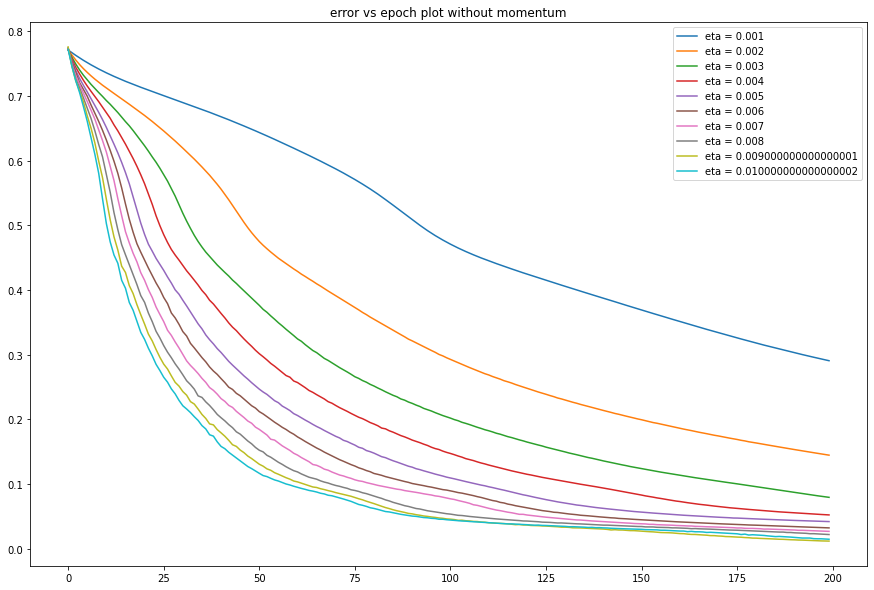

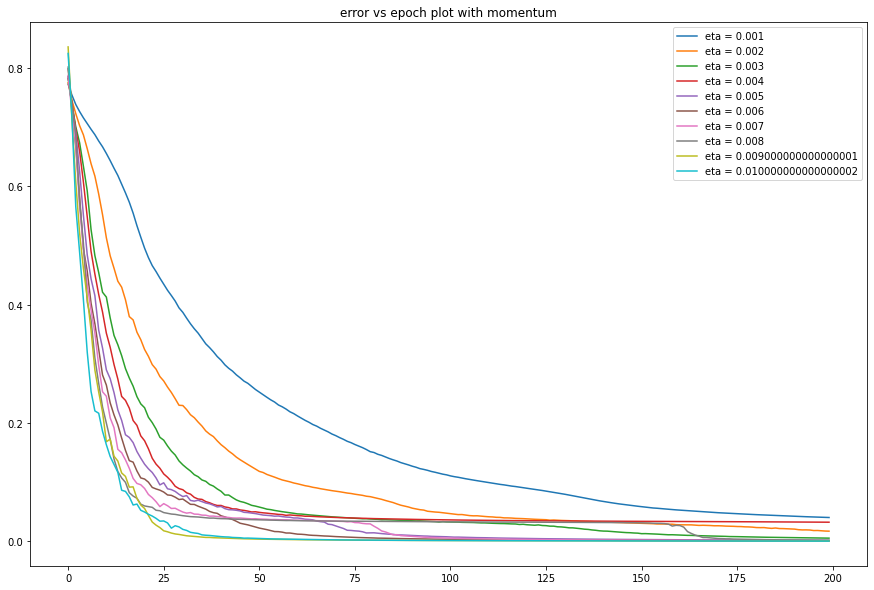

For sigmoid activation function, as seen from the below graph the model converges to an error of 0.5 within 20 epochs. So it never reaches the error of 0.1 that we are looking at. Thus when we use sigmoid activation function, 50% of the data is classified incorrectly Also the max error for the sigmoid function is 0.7
 which is lesser than the max error ofor tanh
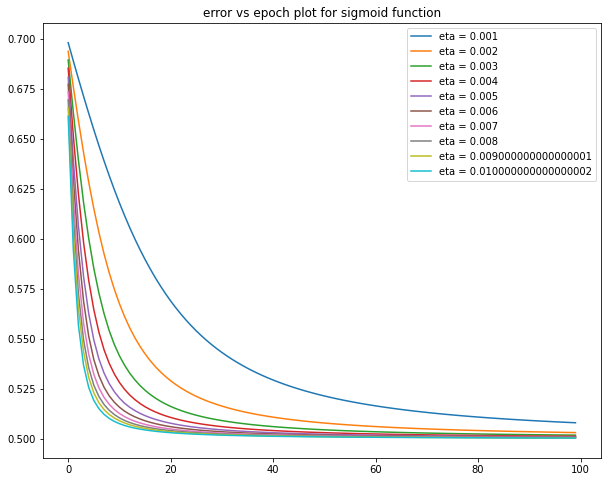

But adding the momentum term seems to be decreasing the min error term to 0.25



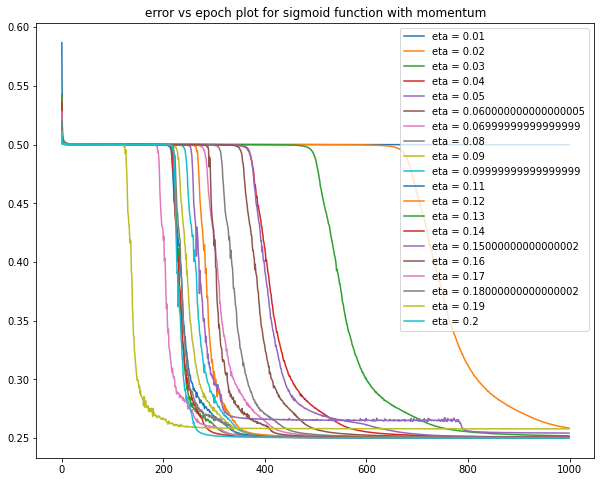

# Conclusion

The built neural netwok with 12 hidden layers can correctly classify the input data. For learning rates less than 0.05 it converges very fast in 15 epochs.

Adding momentum to the learning sometimes helps speed up the training process but in cases where the new effective eta crosses a certain threshold, the convergence is delayed.

Sigmoid activation function on the other hand fails to give an error of 0.1.  Adding momentum here only helps bring down the min error.